Work with the CodeProject.AI Server face API. 

In [2]:
import codeprojectai.core as cpai
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
IP = 'localhost'
PORT = '32168'
TIMEOUT = 20 # Default is 10

## Face API
Run with (in Windows): 
```
docker run --name CodeProject.AI-Server -d -p 32168:32168 ^
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\data,target=/etc/codeproject/ai ^\n
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\modules,target=/app/modules ^\n
  codeproject/ai-server"\n"
```
See [docs](https://www.codeproject.com/ai/docs/why/running_in_docker.html) for Linux and macOS instructions

In [4]:
cpaiface = cpai.CodeProjectAIFace(IP, PORT, TIMEOUT)
print(cpaiface.port)

32168


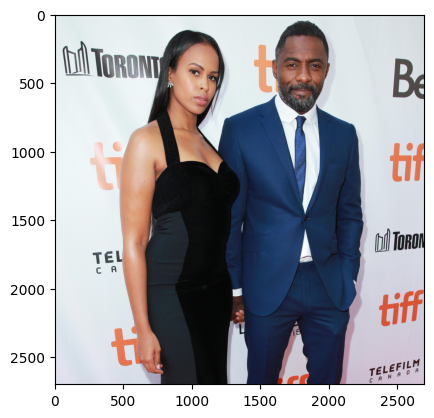

In [6]:
image_path = 'tests/images/couple.jpg'

plt.imshow(Image.open(image_path));

## Face detection
Detect faces, but do not recognise them, quite fast.

In [9]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        predictions = cpaiface.detect(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)

CPU times: total: 0 ns
Wall time: 1.45 s


In [10]:
len(predictions)
predictions

[{'confidence': 0.887992799282074,
  'x_min': 867,
  'y_min': 221,
  'x_max': 1200,
  'y_max': 729},
 {'confidence': 0.8901402354240417,
  'x_min': 1626,
  'y_min': 161,
  'x_max': 1978,
  'y_max': 697}]

## Register a face
Post a name and a close up photo of a face

In [11]:
%%time
try:
    with open('tests/images/idris.jpg', "rb") as image_bytes:
        response = cpaiface.register("idris", image_bytes)
        print(response)
except cpai.CodeProjectAIException as exc:
    print(exc)

face added
CPU times: total: 15.6 ms
Wall time: 490 ms


## Face recognition
Recoginition will match any faces that have been taught. This is slower than face detection

In [12]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        predictions = cpaiface.recognize(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)

CPU times: total: 0 ns
Wall time: 441 ms


In [13]:
predictions

[{'confidence': 0.6566928178071976,
  'userid': 'Tony',
  'x_min': 867,
  'y_min': 221,
  'x_max': 1200,
  'y_max': 729},
 {'confidence': 0.7532858848571777,
  'userid': 'idris',
  'x_min': 1626,
  'y_min': 161,
  'x_max': 1978,
  'y_max': 697}]

## Face list 
Get a list of the registered faces in CodeProject.AI Server

In [14]:
cpaiface.get_registered_faces()

['Chris',
 'Chris Hemsworth',
 'Robert Downey Jr.',
 'Scarlett Johanson',
 'Tony',
 'idris']

## Helper functions
The package provides helper functions for extracting info out of CodeProject.AI Server predictions.

Get recognised faces and their probability (%)

In [15]:
cpai.get_recognized_faces(predictions)

{'Tony': 65.7, 'idris': 75.3}